# Descriptive analysis of handwritten ZIP digits 

I will be using a dataset provided with “The Elements of Statistical Learning: 
Data Mining, Inference, and Prediction” by Trevor Hastie, Robert Tibshirani & Jerome Friedman. 

> Normalized handwritten digits, automatically scanned from envelopes by the U.S. Postal Service. The original scanned digits are binary and of different sizes and orientations; the images here have been deslanted and size normalized, resulting in 16 x 16 grayscale images (Le Cun et al., 1990).
> 
> The data are in two gzipped files, and each line consists of the digit id (0-9) followed by the 256 grayscale values.
> 
> There are 7291 training observations and 2007 test observations [...]

Sources: 
- https://web.stanford.edu/~hastie/ElemStatLearn/datasets/zip.info.txt
- https://web.stanford.edu/~hastie/ElemStatLearn/datasets/zip.test.gz
- https://web.stanford.edu/~hastie/ElemStatLearn/datasets/zip.train.gz
--- 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read CSV file into a pandas DataFrame 
# Does *not* use first line as a header, recognizes white space character as a field separator 
# see https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html 
data = pd.read_csv("data/zip.train", header=None, sep=" ")

In [3]:
# Display the first 10 lines of data to get a first impression 
data.head(10)

,0,1,2,3,4,5,6,7,8,9,...,248,249,250,251,252,253,254,255,256,257
0,6.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-0.631,0.862,...,0.823,1.000,0.482,-0.474,-0.991,-1.000,-1.000,-1.000,-1.0,NaN
1,5.0,-1.0,-1.0,-1.0,-0.813,-0.671,-0.809,-0.887,-0.671,-0.853,...,-0.671,-0.033,0.761,0.762,0.126,-0.095,-0.671,-0.828,-1.0,NaN
2,4.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,...,-1.000,-1.000,-0.109,1.000,-0.179,-1.000,-1.000,-1.000,-1.0,NaN
3,7.0,-1.0,-1.0,-1.0,-1.000,-1.000,-0.273,0.684,0.960,0.450,...,1.000,0.536,-0.987,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,NaN
4,3.0,-1.0,-1.0,-1.0,-1.000,-1.000,-0.928,-0.204,0.751,0.466,...,0.639,1.000,1.000,0.791,0.439,-0.199,-0.883,-1.000,-1.0,NaN
5,6.0,-1.0,-1.0,-1.0,-1.000,-1.000,-0.397,0.983,-0.535,-1.000,...,0.015,-0.862,-0.871,-0.437,-1.000,-1.000,-1.000,-1.000,-1.0,NaN
6,3.0,-1.0,-1.0,-1.0,-0.830,0.442,1.000,1.000,0.479,-0.328,...,0.671,0.345,-0.507,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,NaN
7,1.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,0.510,-0.213,...,0.666,0.301,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,NaN
8,0.0,-1.0,-1.0,-1.0,-1.000,-1.000,-0.454,0.879,-0.745,-1.000,...,1.000,1.000,0.506,-0.174,-0.811,-1.000,-1.000,-1.000,-1.0,NaN
9,1.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-0.909,0.801,...,-0.332,0.735,0.380,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,NaN


As described in ```zip.info.txt``` row 0 holds the value of the integer represented by the following 256 values of gray scale. Row 257 is NaN because all lines end with a non-printing character. 

In [4]:
# Lose the last column 
del data[257]

In [5]:
"""
The int() method can not be applied to a pandas Series, so in ordert to 
convert the values in row 0 to integers I define a lambda function.
"""

int_x = lambda x: int(x)

In [6]:
# I then apply the function on row 0 of the pandas Series 
data.iloc[:,0] = data.iloc[:,0].apply(int_x)

In [7]:
# Check the first lines of data for the conversion
data.head()

,0,1,2,3,4,5,6,7,8,9,...,247,248,249,250,251,252,253,254,255,256
0,6,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-0.631,0.862,...,0.304,0.823,1.000,0.482,-0.474,-0.991,-1.000,-1.000,-1.000,-1.0
1,5,-1.0,-1.0,-1.0,-0.813,-0.671,-0.809,-0.887,-0.671,-0.853,...,-0.671,-0.671,-0.033,0.761,0.762,0.126,-0.095,-0.671,-0.828,-1.0
2,4,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,...,-1.000,-1.000,-1.000,-0.109,1.000,-0.179,-1.000,-1.000,-1.000,-1.0
3,7,-1.0,-1.0,-1.0,-1.000,-1.000,-0.273,0.684,0.960,0.450,...,-0.318,1.000,0.536,-0.987,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0
4,3,-1.0,-1.0,-1.0,-1.000,-1.000,-0.928,-0.204,0.751,0.466,...,0.466,0.639,1.000,1.000,0.791,0.439,-0.199,-0.883,-1.000,-1.0


In [8]:
# Take the first line of data as a sample
sample = (data.iloc[0,1:257])

In [9]:
# Print the sample 
sample.shape

(256,)

In [10]:
sample_image = pd.DataFrame(data.iloc[0:1,1:257])

In [11]:
sample_image.shape

(1, 256)

In [12]:
sample_image = sample_image.values.reshape((16,16))

In [13]:
sample_image.shape

(16, 16)

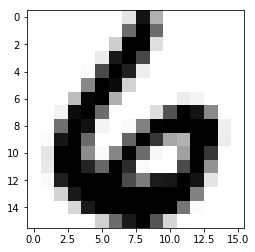

In [14]:
plt.imshow(sample_image, cmap='Greys', interpolation='None')
"""
for alternative colormaps see 
https://matplotlib.org/examples/color/colormaps_reference.html
for interpolation methods see 
https://matplotlib.org/examples/images_contours_and_fields/interpolation_methods.html
"""
plt.show()

In [15]:
"""
To calculate descriptive values for every character all values for a character 
need to be extracted from the dataset respectively. 
For style guidelines see 
https://www.python.org/dev/peps/pep-0008/#function-and-variable-names
"""
def get_data_for_character (data, character):
    # gets all columns in the first row with a matching character 
    data_character = pd.DataFrame(data[data[0] == character]) 
    # ignore the value in the first column and return only grey values 
    grey_values = data_character.iloc[:,1:]
    return grey_values

In [16]:
def make_character_image(data, character, aggregation):
    # calls the function get_data_for_character
    image_data = get_data_for_character(data, character)
    # calculate descriptive statistical values ("stats")
    if(aggregation == 'mean'):
        character_stats = pd.DataFrame(image_data.mean())
    elif(aggregation == 'median'):
        character_stats = pd.DataFrame(image_data.median())
    elif(aggregation == 'min'):
        character_stats = pd.DataFrame(image_data.min())
    elif(aggregation == 'max'):
        character_stats = pd.DataFrame(image_data.max())
    else:
        print("No valid aggregation method provided.")
    # Reshape the output from 1*256 to 16*16 and return product 
    return character_stats.values.reshape(16,16)

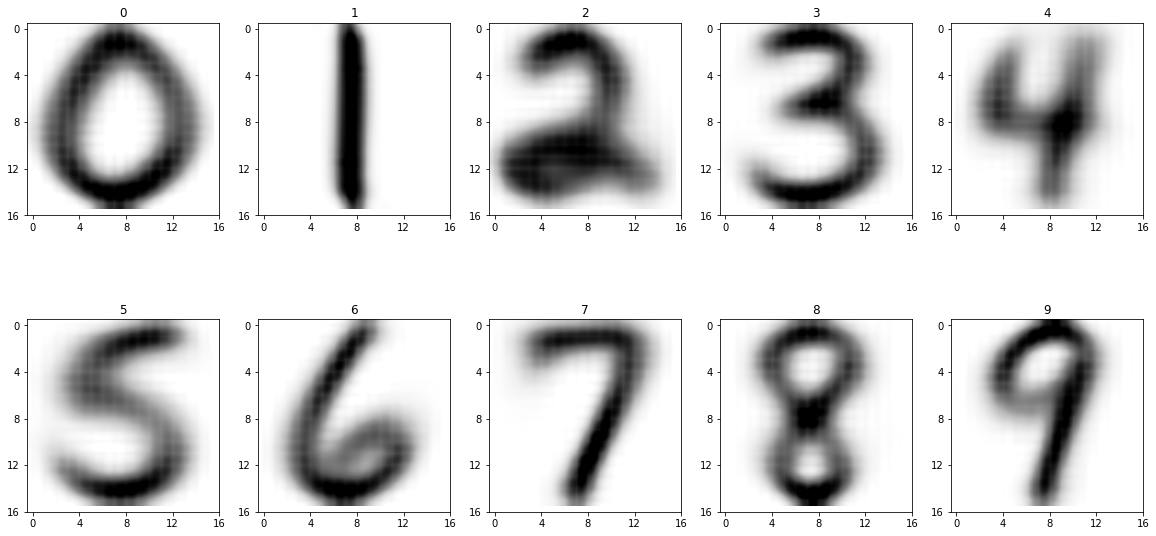

In [17]:
plt.figure(1, figsize=(20, 10))

for i in range(0,10):
    image = make_character_image(data,i,'mean')
    
    # create one subplot for every character 
    plt.subplot(2,5, 1 + i)
    plt.imshow(image, cmap='Greys', interpolation='sinc')
    ticks_val = [0, 4, 8, 12, 16] 
    ticks_lab = ['0', '4', '8', '12', '16'] 
    plt.title(i)
    plt.xticks(ticks_val, ticks_lab)
    plt.yticks(ticks_val, ticks_lab)
    
plt.show()

In [18]:
def make_character_image(data, character, aggregation):
    # calls the function get_data_for_character
    image_data = get_data_for_character(data, character)
    # calculate descriptive statistical values ("stats")
    if(aggregation == 'mean'):
        character_stats = pd.DataFrame(image_data.mean())
    elif(aggregation == 'median'):
        character_stats = pd.DataFrame(image_data.median())
    elif(aggregation == 'min'):
        character_stats = pd.DataFrame(image_data.min())
    elif(aggregation == 'max'):
        character_stats = pd.DataFrame(image_data.max())
    else:
        print("No valid aggregation method provided.")
    # Reshape the output from 1*256 to 16*16 and return product 
    return character_stats.values.reshape(1,256)

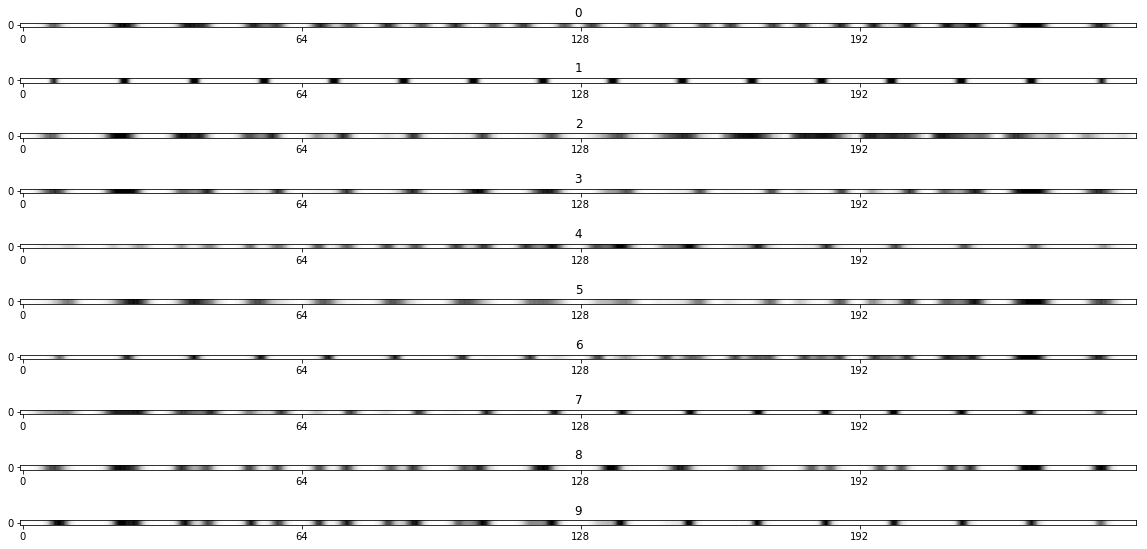

In [19]:
plt.figure(1, figsize=(20, 10))

for i in range(0,10):
    image = make_character_image(data,i,'mean')
    
    # create one subplot for every character 
    plt.subplot(10,1, 1 + i)
    ticks_xval = [0, 64, 128, 192, 256] 
    ticks_xlab = ['0', '64', '128', '192', '256'] 
    ticks_yval = [0, 1] 
    ticks_ylab = ['0', '1'] 
    plt.xticks(ticks_xval, ticks_xlab)
    plt.yticks(ticks_yval, ticks_ylab)
    plt.title(i)
    plt.imshow(image, cmap='Greys', interpolation='sinc')
    plt.figure(1, figsize=(20,1))
    
plt.show()